In [2]:
import os
import conda
import pandas as pd
import numpy as np
import json
from scipy.optimize import curve_fit
# from shapely.geometry import Polygon as Poly

pd.options.display.max_columns = 250

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors as colors

import geopandas
from geopandas.tools import sjoin
import geoplot as gplt
import geoplot.crs as gcrs

import folium

# Data from USGS

### Import geodata

In [27]:
SoilGeoChemical_sites  = geopandas.GeoDataFrame.from_file('ds-801/site.shp', converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)})
# SoilGeoChemical_df.crs = {'init' :'epsg:4326'}
SoilGeoChemical_sites

,site_id,state,latitude,longitude,colldate,landcover1,landcover2,the_geom,fips,huc,quad,geometry
0,3246,MT,48.8805,-111.8966,None,Barren,Transitional,0101000020E6100000FE65F7E461F95BC062105839B470...,f30101,h10030203,q49112NWA1,POINT (-111.8966 48.8805)
1,1041,MT,48.9428,-111.4018,None,Forested Upland,Evergreen Forest,0101000020E610000019E25817B7D95BC09B559FABAD78...,f30101,h10050002,q49112NWE1,POINT (-111.4018 48.9428)
2,1169,MT,48.8426,-112.3294,None,Planted/Cultivated,Small Grains,0101000020E61000005BD3BCE314155CC007CE1951DA6B...,f30035,h10030202,q49114NEF2,POINT (-112.3294 48.8426)
3,3502,MT,48.7195,-113.4757,None,Shrubland,Shrubland,0101000020E610000043AD69DE715E5CC06ABC7493185C...,f30035,h10010002,q49114NWE3,POINT (-113.4757 48.7195)
4,6318,MT,48.9723,-110.9086,None,Herbaceous Upland,Grasslands/Herbaceous,0101000020E610000052499D8026BA5BC04DF38E53747C...,f30051,h10050006,q49112NEA1,POINT (-110.9086 48.9723)
5,9838,MT,48.9175,-109.4041,None,Barren,Transitional,0101000020E610000012143FC6DC595BC03D0AD7A37075...,f30005,h10050008,q49110NWE1,POINT (-109.4041 48.9175)
6,7342,MT,48.6672,-112.0643,None,Planted/Cultivated,Fallow,0101000020E61000008048BF7D1D045CC013F241CF6655...,f30101,h10030203,q49114NEH3,POINT (-112.0643 48.6672)
7,5742,MT,48.9402,-109.1403,None,Shrubland,Shrubland,0101000020E61000003EE8D9ACFA485BC07FD93D795878...,f30005,h10050008,q49110NWG1,POINT (-109.1403 48.9402)
8,1143,MT,48.6633,-111.6868,None,Herbaceous Upland,Grasslands/Herbaceous,0101000020E610000024B9FC87F4EB5BC0E9B7AF03E754...,f30101,h10030204,q49112NWC3,POINT (-111.6868 48.6633)
9,174,MT,48.9824,-108.0806,None,Herbaceous Upland,Grasslands/Herbaceous,0101000020E6100000B003E78C28055BC092CB7F48BF7D...,f30071,h10050011,q49110NEH1,POINT (-108.0806 48.9824)


In [44]:
# #import geovoronoi
# from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
# from geovoronoi import voronoi_regions_from_coords, points_to_coords, coords_to_points

In [132]:
# SoilGeoChemical_coords = SoilGeoChemical_df
# # SoilGeoChemical_coords['coords'] = 
# coords_USGS = points_to_coords(SoilGeoChemical_df['geometry'])
# coords_USGS

array([[-111.8966,   48.8805],
       [-111.4018,   48.9428],
       [-112.3294,   48.8426],
       ...,
       [ -82.1198,   27.2701],
       [ -82.4277,   27.259 ],
       [ -81.1126,   26.9457]])

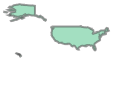

In [120]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# area = world[world.name == 'United States of America']
# area_shape = area.iloc[0].geometry
# area_shape
# # area.to_file('US.shp')

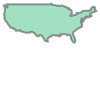

In [137]:
# UScontinental = geopandas.GeoDataFrame.from_file('UScontinetal.shp')
# UScontinental.crs = {'init' :'epsg:4326'}
# area_shape_UScontinental = UScontinental.iloc[0].geometry
# area_shape_UScontinental

In [71]:
# coords_USGS_test=coords_USGS
# coords_USGS_test
# # poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords_test, area_shape)

array([[-111.8966,   48.8805],
       [-111.4018,   48.9428],
       [-112.3294,   48.8426],
       ...,
       [ -82.1198,   27.2701],
       [ -82.4277,   27.259 ],
       [ -81.1126,   26.9457]])

In [163]:
# # N_POINTS = 30
# COUNTRY = 'Italy'

# np.random.seed(123)

# # print('loading country `%s` from naturalearth_lowres' % COUNTRY)
# # world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# # area = world[world.name == COUNTRY]
# # assert len(area) == 1

# # print('CRS:', area.crs)   # gives epsg:4326 -> WGS 84

# # area = area.to_crs(epsg=3395)    # convert to World Mercator CRS
# # area_shape = area.iloc[0].geometry   # get the Polygon

# UScontinental = geopandas.GeoDataFrame.from_file('UScontinetal.shp')
# UScontinental.crs = {'init' :'epsg:4326'}
# area_shape_UScontinental = UScontinental.iloc[0].geometry
# area_shape_UScontinental

# # generate some random points within the bounds
# # minx, miny, maxx, maxy = area_shape.bounds

# # randx = np.random.uniform(minx, maxx, N_POINTS)
# # randy = np.random.uniform(miny, maxy, N_POINTS)
# # coords = np.vstack((randx, randy)).T

# # use only the points inside the geographic area
# # pts = [p for p in coords_to_points(coords) if p.within(area_shape_UScontinental)]  # converts to shapely Point

# # print('will use %d of %d randomly generated points that are inside geographic area' % (len(pts), N_POINTS))
# # coords_random = points_to_coords(pts)   # convert back to simple NumPy coordinate array

# # del pts
# # coords = coords_random

# # use only the points inside the geographic area
# coords_USGS_test=np.array([coords_USGS[77], coords_USGS[90], coords_USGS[66], coords_USGS[53]])
# coords_USGS_pts = [p for p in coords_to_points(coords_USGS_test) if p.within(area_shape_UScontinental)]  # converts to shapely Point
# coords=points_to_coords(coords_USGS_pts)
# # coords=coords_USGS[0:50]

# # coords=np.array([[ -82.1198, 27.2701], [ -82.4277, 27.259 ],  [ -81.1126, 26.9457], [ -96.92659431,   45.85092824],
# #        [-102.053187  ,   34.4350416 ],
# #        [-104.87809986,   32.78081283],
# #        [ -82.60460184,   33.69183771],
# #        [ -99.37170172,   29.23883674],
# #        [-121.24244971,   45.23494049],
# #        [-101.71108062,   33.31276653],
# #        [ -82.08823331,   38.50759178],
# #        [-114.15332203,   39.14403657],
# #        [-114.5596873 ,   37.75797322],])

# #
# # calculate the Voronoi regions, cut them with the geographic area shape and assign the points to them
# #
# poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape_UScontinental)

# #
# # plotting
# #

# fig, ax = subplot_for_map()

# plot_voronoi_polys_with_points_in_area(ax, area_shape_UScontinental, poly_shapes, coords, poly_to_pt_assignments)
# #plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

# ax.set_title('%d random points and their Voronoi regions in %s' % (len(pts), COUNTRY))

# plt.tight_layout()
# # plt.savefig('random_points_across_italy.png')
# plt.show()

RuntimeError: no polygonal hull of far points could be created

### Import geochemical data from USGS and merge with the samples places (and HUC8)
Data reported by USGS is total phosphorus contained in soil. However, plants uptake is a fraction of total phosphorus. Therefore, sevaral starized phosphorus soil test, such as Olsen, Bray 1 and Mehlich 3 tests, has been developed to estimate P efficiency for crops. To correlate soil-test phosphorus and total phosphorus, correlations from Allen and Mallarino (2006) have been adapted to estimate soil-test phosphorus from total phosphorus available data, choosing Mehlich 3 (M3P) as P soil test since is widely use and it is the P soil testless affected by changes in soil pH. 

$M3P \ (\% \text{ over TP}) = \frac{4.698 \cdot 10^{-1}}{1+\left(TotalP \ (mg/kg) \cdot 1.336 \cdot 10^{-3}\right)^{-2.148}}$ (see below)

However, these estimations must to be considered as an exploratory effort to determine soil quality in an attemp of select the most suitable nutrients management technology according with the geographical environmental indicators, since the correlations has been developed for agricultural soils in Iowa. 

In [3]:
SoilGeoChemical_data = pd.read_csv('ds-801-csv/ahorizon.csv')

/home/emh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


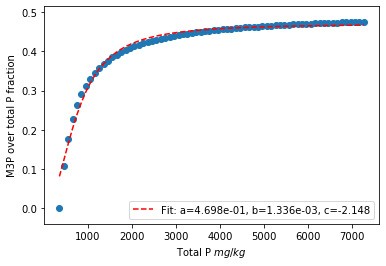

In [23]:
# TPfit_array = np.arange(SoilGeoChemical_data['p_ppm'].min(), SoilGeoChemical_data['p_ppm'].max(), 100)
M3Pfit_array = np.arange(0, 3500, 50)
TPfit_array = 362+2*M3Pfit_array
frac_M3P_TP = M3Pfit_array/TPfit_array

def func_Sigmoidal(xdata, a, b, c):
    return a/(1+((xdata)*b)**(c)) #Sigmoidal function

# def func_Monod(xdata, a, b):
#     return (a*xdata)/(b+xdata) #Monod function

parameters_Sigmoidal, cov_Sigmoidal = curve_fit(func_Sigmoidal, TPfit_array, frac_M3P_TP)
# parameters_Monod, cov_Monod = curve_fit(func_Monod, TPfit_array, frac_M3P_TP)

plt.scatter(x = TPfit_array, y = frac_M3P_TP)
plt.plot(TPfit_array, func_Sigmoidal(TPfit_array, *parameters_Sigmoidal), 'r--',
         label='Fit: a=%5.3e, b=%5.3e, c=%5.3f' % tuple(parameters_Sigmoidal))
# plt.plot(TPfit_array, func_Monod(TPfit_array, *parameters_Monod), 'r--', label='Fit')
plt.xlabel("Total P $mg/kg$")
plt.ylabel('M3P over total P fraction')
plt.legend(loc='lower right')
plt.savefig('frac_M3P_TP_fit.pdf')

In [25]:
SoilGeoChemical_data = pd.read_csv('ds-801-csv/ahorizon.csv')
SoilGeoChemical_data['M3P_ppm'] = (4.698E-1/(1+(SoilGeoChemical_data['p_ppm']*1.336E-3)**(-2.148)))*SoilGeoChemical_data['p_ppm']
SoilGeoChemical_data

,rec_id,lab_id,site_id,horizon,depth_cm,quartz_pct,tot_k_fs_pct,tot_plag_pct,tot_flds_pct,tot_14a_pct,tot_10a_pct,kaolinit_pct,tot_clay_pct,gibbsite_pct,calcite_pct,dolomite_pct,aragon_pct,tot_carb_pct,analcime_pct,heuland_pct,tot_zeol_pct,gypsum_pct,talc_pct,hornbl_pct,serpent_pct,hematite_pct,goethite_pct,pyroxene_pct,pyrite_pct,other_pct,amorph_pct,ag_ppm_q,ag_ppm,al_pct_q,al_pct,as_ppm_q,as_ppm,ba_ppm_q,ba_ppm,be_ppm_q,be_ppm,bi_ppm_q,bi_ppm,c_tot_pct,c_tot_pct_q,c_inorg_pct,c_inorg_pct_q,c_org_pct,c_org_pct_q,ca_pct_q,ca_pct,cd_ppm_q,cd_ppm,ce_ppm_q,ce_ppm,co_ppm_q,co_ppm,cr_ppm_q,cr_ppm,cs_ppm_q,cs_ppm,cu_ppm_q,cu_ppm,fe_pct_q,fe_pct,ga_ppm_q,ga_ppm,hg_ppm_q,hg_ppm,in_ppm_q,in_ppm,k_pct_q,k_pct,la_ppm_q,la_ppm,li_ppm_q,li_ppm,mg_pct_q,mg_pct,mn_ppm_q,mn_ppm,mo_ppm_q,mo_ppm,na_pct_q,na_pct,nb_ppm_q,nb_ppm,ni_ppm_q,ni_ppm,p_ppm_q,p_ppm,pb_ppm_q,pb_ppm,rb_ppm_q,rb_ppm,s_pct_q,s_pct,sb_ppm_q,sb_ppm,sc_ppm_q,sc_ppm,se_ppm_q,se_ppm,sn_ppm_q,sn_ppm,sr_ppm_q,sr_ppm,te_ppm_q,te_ppm,th_ppm_q,th_ppm,ti_pct_q,ti_pct,tl_ppm_q,tl_ppm,u_ppm_q,u_ppm,v_ppm_q,v_ppm,w_ppm_q,w_ppm,y_ppm_q,y_ppm,zn_ppm_q,zn_ppm,Unnamed: 125,M3P_ppm
0,1,C-328943,96,NaN,2-30,93.4,0.5,NaN,0.5,NaN,2.1,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,<1,NaN,NaN,0.87,NaN,1.6,NaN,49.0,NaN,0.2,NaN,0.08,0.71,NaN,NaN,NaN,0.71,NaN,NaN,0.07,<0.1,NaN,NaN,25.20,NaN,1.2,NaN,11.0,<5,NaN,NaN,4.4,NaN,0.57,NaN,1.96,NaN,0.01,<0.02,NaN,NaN,0.09,NaN,11.4,NaN,5.0,NaN,0.03,NaN,81.0,NaN,0.34,<0.01,NaN,NaN,5.2,NaN,3.2,NaN,260.0,NaN,6.8,NaN,8.4,<0.01,NaN,NaN,0.19,NaN,1.6,<0.2,NaN,NaN,0.5,NaN,6.2,<0.1,NaN,NaN,4.4,NaN,0.24,<0.1,NaN,NaN,1.4,NaN,14.0,NaN,0.3,NaN,3.8,NaN,15.0,NaN,11.424443
1,2,C-328929,208,NaN,0-20,93.3,3.5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,<1,NaN,NaN,1.15,NaN,1.5,NaN,118.0,NaN,0.4,NaN,0.10,0.88,NaN,NaN,NaN,0.88,NaN,NaN,0.02,<0.1,NaN,NaN,27.80,NaN,2.4,NaN,14.0,<5,NaN,NaN,6.1,NaN,0.54,NaN,2.24,NaN,0.02,<0.02,NaN,NaN,0.25,NaN,13.8,NaN,8.0,NaN,0.05,NaN,191.0,NaN,0.36,NaN,0.02,NaN,3.5,NaN,4.6,NaN,170.0,NaN,11.6,NaN,20.0,<0.01,NaN,NaN,0.23,NaN,1.6,<0.2,NaN,NaN,0.5,NaN,15.2,<0.1,NaN,NaN,3.2,NaN,0.13,NaN,0.2,NaN,1.1,NaN,16.0,NaN,0.3,NaN,4.9,NaN,17.0,NaN,3.176666
2,3,C-328930,288,NaN,0-20,97.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,<1,NaN,NaN,1.05,NaN,1.2,NaN,34.0,NaN,0.2,NaN,0.07,0.65,NaN,NaN,NaN,0.65,NaN,NaN,0.05,<0.1,NaN,NaN,42.20,NaN,1.0,NaN,8.0,<5,NaN,NaN,10.9,NaN,0.38,NaN,1.98,<0.01,NaN,<0.02,NaN,NaN,0.05,NaN,23.4,NaN,5.0,NaN,0.03,NaN,249.0,NaN,0.41,<0.01,NaN,NaN,3.4,NaN,4.2,NaN,510.0,NaN,7.0,NaN,5.7,<0.01,NaN,NaN,0.19,NaN,1.4,<0.2,NaN,NaN,0.6,NaN,3.9,<0.1,NaN,NaN,3.0,NaN,0.13,<0.1,NaN,NaN,1.0,NaN,12.0,NaN,0.4,NaN,16.3,NaN,19.0,NaN,73.051428
3,4,C-329034,656,NaN,0-20,74.4,NaN,NaN,NaN,NaN,6.9,5.0,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,<1,NaN,NaN,4.17,NaN,3.7,NaN,316.0,NaN,1.1,NaN,0.16,1.14,NaN,NaN,NaN,1.14,NaN,NaN,0.05,<0.1,NaN,NaN,41.70,NaN,7.0,NaN,28.0,<5,NaN,NaN,13.8,NaN,2.38,NaN,9.53,NaN,0.03,NaN,0.03,NaN,0.89,NaN,20.6,NaN,21.0,NaN,0.16,NaN,228.0,NaN,1.19,NaN,0.06,NaN,8.4,NaN,11.5,NaN,200.0,NaN,14.0,NaN,57.8,NaN,0.01,NaN,0.62,NaN,7.5,NaN,0.5,NaN,1.3,NaN,30.4,<0.1,NaN,NaN,8.2,NaN,0.31,NaN,0.5,NaN,2.4,NaN,56.0,NaN,0.8,NaN,8.8,NaN,32.0,NaN,5.211987
4,5,C-328968,912,NaN,0-5,88.9,2.9,NaN,2.9,NaN,2.6,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,<1,NaN,NaN,1.51,NaN,2.7,NaN,179.0,NaN,0.6,NaN,0.09,1.36,NaN,NaN,NaN,1.36,NaN,NaN,0.03,<0.1,NaN,NaN,61.70,NaN,6.1,NaN,17.0,<5,NaN,NaN,5.2,NaN,1.06,NaN,3.29,NaN,0.03,<0.02,NaN,NaN,0.44,NaN,21.0,NaN,6.0,NaN,0.06,NaN,321.0,NaN,0.48,NaN,0.06,NaN,0.6,NaN,6.9,NaN,200.0,NaN,14.5,NaN,24.6,NaN,0.01,NaN,0.10,NaN,2.2,<0.2,NaN,NaN,0.4,NaN,21.9,<0.1,NaN,NaN,5.0,NaN,0.05,NaN,0.3,NaN,1.4,NaN,21.0,<0.1,NaN,NaN,8.4,NaN,32.0,NaN,5.211987
5,6,C-329029,1232,NaN,0-10,82.3,0.6,NaN,0.6,NaN,5.5,4.0,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:
SoilGeoChemical_data_sites = pd.merge(SoilGeoChemical_sites, SoilGeoChemical_data, on="site_id", how = 'left')
SoilGeoChemical_data_sites

,site_id,state,latitude,longitude,colldate,landcover1,landcover2,the_geom,fips,huc,quad,geometry,rec_id,lab_id,horizon,depth_cm,quartz_pct,tot_k_fs_pct,tot_plag_pct,tot_flds_pct,tot_14a_pct,tot_10a_pct,kaolinit_pct,tot_clay_pct,gibbsite_pct,calcite_pct,dolomite_pct,aragon_pct,tot_carb_pct,analcime_pct,heuland_pct,tot_zeol_pct,gypsum_pct,talc_pct,hornbl_pct,serpent_pct,hematite_pct,goethite_pct,pyroxene_pct,pyrite_pct,other_pct,amorph_pct,ag_ppm_q,ag_ppm,al_pct_q,al_pct,as_ppm_q,as_ppm,ba_ppm_q,ba_ppm,be_ppm_q,be_ppm,bi_ppm_q,bi_ppm,c_tot_pct,c_tot_pct_q,c_inorg_pct,c_inorg_pct_q,c_org_pct,c_org_pct_q,ca_pct_q,ca_pct,cd_ppm_q,cd_ppm,ce_ppm_q,ce_ppm,co_ppm_q,co_ppm,cr_ppm_q,cr_ppm,cs_ppm_q,cs_ppm,cu_ppm_q,cu_ppm,fe_pct_q,fe_pct,ga_ppm_q,ga_ppm,hg_ppm_q,hg_ppm,in_ppm_q,in_ppm,k_pct_q,k_pct,la_ppm_q,la_ppm,li_ppm_q,li_ppm,mg_pct_q,mg_pct,mn_ppm_q,mn_ppm,mo_ppm_q,mo_ppm,na_pct_q,na_pct,nb_ppm_q,nb_ppm,ni_ppm_q,ni_ppm,p_ppm_q,p_ppm,pb_ppm_q,pb_ppm,rb_ppm_q,rb_ppm,s_pct_q,s_pct,sb_ppm_q,sb_ppm,sc_ppm_q,sc_ppm,se_ppm_q,se_ppm,sn_ppm_q,sn_ppm,sr_ppm_q,sr_ppm,te_ppm_q,te_ppm,th_ppm_q,th_ppm,ti_pct_q,ti_pct,tl_ppm_q,tl_ppm,u_ppm_q,u_ppm,v_ppm_q,v_ppm,w_ppm_q,w_ppm,y_ppm_q,y_ppm,zn_ppm_q,zn_ppm,Unnamed: 125,M3P_ppm
0,3246,MT,48.8805,-111.8966,None,Barren,Transitional,0101000020E6100000FE65F7E461F95BC062105839B470...,f30101,h10030203,q49112NWA1,POINT (-111.8966 48.8805),2169.0,C-335485,NaN,0-10,26.2,NaN,NaN,NaN,NaN,31.6,3.7,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,<1,NaN,NaN,8.23,NaN,10.9,NaN,437.0,NaN,2.2,NaN,0.25,1.14,NaN,NaN,NaN,1.14,NaN,NaN,1.30,NaN,0.3,NaN,69.20,NaN,10.1,NaN,72.0,NaN,9.0,NaN,21.9,NaN,2.94,NaN,19.00,NaN,0.04,NaN,0.05,NaN,2.69,NaN,37.3,NaN,80.0,NaN,1.76,NaN,156.0,NaN,1.03,NaN,1.24,NaN,13.8,NaN,35.1,NaN,1220.0,NaN,114.0,NaN,144.0,NaN,1.69,NaN,0.70,NaN,13.9,NaN,0.4,NaN,2.1,NaN,199.0,<0.1,NaN,NaN,11.5,NaN,0.35,NaN,1.0,NaN,3.8,NaN,228.0,NaN,1.3,NaN,21.0,NaN,127.0,NaN,424.509617
1,1041,MT,48.9428,-111.4018,None,Forested Upland,Evergreen Forest,0101000020E610000019E25817B7D95BC09B559FABAD78...,f30101,h10050002,q49112NWE1,POINT (-111.4018 48.9428),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1169,MT,48.8426,-112.3294,None,Planted/Cultivated,Small Grains,0101000020E61000005BD3BCE314155CC007CE1951DA6B...,f30035,h10030202,q49114NEF2,POINT (-112.3294 48.8426),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3502,MT,48.7195,-113.4757,None,Shrubland,Shrubland,0101000020E610000043AD69DE715E5CC06ABC7493185C...,f30035,h10010002,q49114NWE3,POINT (-113.4757 48.7195),2173.0,C-335489,NaN,0-10,44.3,3.6,9.5,13.1,NaN,16.1,1.8,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.7,<1,NaN,NaN,5.12,NaN,8.2,NaN,895.0,NaN,1.4,NaN,0.22,8.15,NaN,NaN,NaN,8.15,NaN,NaN,0.76,NaN,0.3,NaN,51.80,NaN,6.0,NaN,28.0,<5,NaN,NaN,20.0,NaN,2.01,NaN,12.10,NaN,0.04,NaN,0.04,NaN,1.79,NaN,26.9,NaN,35.0,NaN,0.79,NaN,669.0,NaN,0.90,NaN,0.65,NaN,8.0,NaN,9.9,NaN,1700.0,NaN,14.9,NaN,97.1,NaN,0.09,NaN,0.55,NaN,6.6,NaN,0.2,NaN,1.3,NaN,98.8,<0.1,NaN,NaN,7.9,NaN,0.20,NaN,0.4,NaN,2.2,NaN,55.0,NaN,0.9,NaN,15.2,NaN,84.0,

Remove samples (rows) with no phosphorus data

In [29]:
SoilGeoChemical_Pfiltered = SoilGeoChemical_data_sites[SoilGeoChemical_data_sites.p_ppm.isnull() == False]
SoilGeoChemical_Pfiltered = SoilGeoChemical_Pfiltered.rename(columns={"huc": "HUC_8"})
for index, row in SoilGeoChemical_Pfiltered.iterrows():
    row['HUC_8'] = row['HUC_8'][1:]
    SoilGeoChemical_Pfiltered.loc[index, 'HUC_8'] = row['HUC_8']
    
    if len(row['HUC_8'])<8:
        row['HUC_8'] = '0' + row['HUC_8']
        SoilGeoChemical_Pfiltered.loc[index, 'HUC_8'] = row['HUC_8']
SoilGeoChemical_Pfiltered

,site_id,state,latitude,longitude,colldate,landcover1,landcover2,the_geom,fips,HUC_8,quad,geometry,rec_id,lab_id,horizon,depth_cm,quartz_pct,tot_k_fs_pct,tot_plag_pct,tot_flds_pct,tot_14a_pct,tot_10a_pct,kaolinit_pct,tot_clay_pct,gibbsite_pct,calcite_pct,dolomite_pct,aragon_pct,tot_carb_pct,analcime_pct,heuland_pct,tot_zeol_pct,gypsum_pct,talc_pct,hornbl_pct,serpent_pct,hematite_pct,goethite_pct,pyroxene_pct,pyrite_pct,other_pct,amorph_pct,ag_ppm_q,ag_ppm,al_pct_q,al_pct,as_ppm_q,as_ppm,ba_ppm_q,ba_ppm,be_ppm_q,be_ppm,bi_ppm_q,bi_ppm,c_tot_pct,c_tot_pct_q,c_inorg_pct,c_inorg_pct_q,c_org_pct,c_org_pct_q,ca_pct_q,ca_pct,cd_ppm_q,cd_ppm,ce_ppm_q,ce_ppm,co_ppm_q,co_ppm,cr_ppm_q,cr_ppm,cs_ppm_q,cs_ppm,cu_ppm_q,cu_ppm,fe_pct_q,fe_pct,ga_ppm_q,ga_ppm,hg_ppm_q,hg_ppm,in_ppm_q,in_ppm,k_pct_q,k_pct,la_ppm_q,la_ppm,li_ppm_q,li_ppm,mg_pct_q,mg_pct,mn_ppm_q,mn_ppm,mo_ppm_q,mo_ppm,na_pct_q,na_pct,nb_ppm_q,nb_ppm,ni_ppm_q,ni_ppm,p_ppm_q,p_ppm,pb_ppm_q,pb_ppm,rb_ppm_q,rb_ppm,s_pct_q,s_pct,sb_ppm_q,sb_ppm,sc_ppm_q,sc_ppm,se_ppm_q,se_ppm,sn_ppm_q,sn_ppm,sr_ppm_q,sr_ppm,te_ppm_q,te_ppm,th_ppm_q,th_ppm,ti_pct_q,ti_pct,tl_ppm_q,tl_ppm,u_ppm_q,u_ppm,v_ppm_q,v_ppm,w_ppm_q,w_ppm,y_ppm_q,y_ppm,zn_ppm_q,zn_ppm,Unnamed: 125,M3P_ppm
0,3246,MT,48.8805,-111.8966,None,Barren,Transitional,0101000020E6100000FE65F7E461F95BC062105839B470...,f30101,10030203,q49112NWA1,POINT (-111.8966 48.8805),2169.0,C-335485,NaN,0-10,26.2,NaN,NaN,NaN,NaN,31.6,3.7,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,<1,NaN,NaN,8.23,NaN,10.9,NaN,437.0,NaN,2.2,NaN,0.25,1.14,NaN,NaN,NaN,1.14,NaN,NaN,1.30,NaN,0.3,NaN,69.20,NaN,10.1,NaN,72.0,NaN,9.0,NaN,21.9,NaN,2.94,NaN,19.00,NaN,0.04,NaN,0.05,NaN,2.69,NaN,37.3,NaN,80.0,NaN,1.76,NaN,156.0,NaN,1.03,NaN,1.24,NaN,13.8,NaN,35.1,NaN,1220.0,NaN,114.0,NaN,144.0,NaN,1.69,NaN,0.70,NaN,13.9,NaN,0.4,NaN,2.1,NaN,199.0,<0.1,NaN,NaN,11.5,NaN,0.35,NaN,1.0,NaN,3.8,NaN,228.0,NaN,1.3,NaN,21.0,NaN,127.0,NaN,424.509617
3,3502,MT,48.7195,-113.4757,None,Shrubland,Shrubland,0101000020E610000043AD69DE715E5CC06ABC7493185C...,f30035,10010002,q49114NWE3,POINT (-113.4757 48.7195),2173.0,C-335489,NaN,0-10,44.3,3.6,9.5,13.1,NaN,16.1,1.8,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.7,<1,NaN,NaN,5.12,NaN,8.2,NaN,895.0,NaN,1.4,NaN,0.22,8.15,NaN,NaN,NaN,8.15,NaN,NaN,0.76,NaN,0.3,NaN,51.80,NaN,6.0,NaN,28.0,<5,NaN,NaN,20.0,NaN,2.01,NaN,12.10,NaN,0.04,NaN,0.04,NaN,1.79,NaN,26.9,NaN,35.0,NaN,0.79,NaN,669.0,NaN,0.90,NaN,0.65,NaN,8.0,NaN,9.9,NaN,1700.0,NaN,14.9,NaN,97.1,NaN,0.09,NaN,0.55,NaN,6.6,NaN,0.2,NaN,1.3,NaN,98.8,<0.1,NaN,NaN,7.9,NaN,0.20,NaN,0.4,NaN,2.2,NaN,55.0,NaN,0.9,NaN,15.2,NaN,84.0,NaN,681.626565
4,6318,MT,48.9723,-110.9086,None,Herbaceous Upland,Grasslands/Herbaceous,0101000020E610000052499D8026BA5BC04DF38E53747C...,f30051,10050006,q49112NEA1,POINT (-110.9086 48.9723),2226.0,C-335451,NaN,0-30,49.7,2.9,14.1,16.9,NaN,11.6,0.8,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,<1,NaN,NaN,5.53,NaN,8.2,NaN,675.0,NaN,1.5,NaN,0.21,1.02,NaN,NaN,NaN,1.02,NaN,NaN,0.69,NaN,0.2,NaN,58.70,NaN,8.1,NaN,20.0,<5,NaN,NaN,12.9,NaN,2.01,NaN,12.40,NaN,0.02,NaN,0.04,NaN,1.98,NaN,29.0,NaN,20.0,NaN,0.56,NaN,397.0,NaN,0.66,NaN,1.16,NaN,8.5,NaN,13.8,NaN,510.0,NaN,13.1,NaN,87.4,NaN,0.03,NaN,0.82,NaN,6.9,NaN,0.3,NaN,1.4,NaN,124.0,<0.1,NaN,NaN,9.0,NaN,0.23,NaN,0.5,NaN,2.1,NaN,51.0,NaN,1.1,NaN,15.2,NaN,51.0,NaN,73.051428
5,9838,MT,48.9175,-109.4041,None,Barren,Transitional,0101000020E610000012143FC6DC595BC03D0AD7A37075...,f30005,10050008,q49110NWE1,POINT (-109.4041 48.9175),2293.0,C-337577,NaN,0-20,55.8,6.2,21.6,27.7,0.8,5.6,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,<1,NaN,NaN,4.92,NaN,5.4,NaN,766.0,NaN,1.0,NaN,0.12,1.01,NaN,NaN,NaN,1.01,NaN,NaN,0.71,NaN,0.1,NaN,41.70,NaN,5.6,NaN,20.0,<5,NaN,NaN,12.0,NaN,1.27,NaN,8.16,NaN,0.01,<0.02,NaN,NaN,1.56,NaN,21.2,NaN,15.0,NaN,0.27,NaN,303.0,NaN,0.52,NaN,1.38,NaN,5.5,NaN,8.7,NaN,360.0,NaN,11.3,NaN,52.2,NaN,0.02,NaN,0.46,NaN,4.

Group by HUC8 and calculate the mean

In [30]:
SoilGeoChemical_Pgrouped = SoilGeoChemical_Pfiltered.groupby(['HUC_8']).mean()

### Interpretation of Mehlich 3 P test
The correlation between the Mehlich 3 P test value and the quality of soil reported by the University of Arkansas is selected:

| Soil Fertility Level | M3P (ppm) |
|:--------------------:|:---------:|
|       Very Low       |    <16    |
|          Low         |   16-25   |
|        Medium        |   26-35   |
|        Optimum       |   36-50   |
|       Excessive      |    >50    |

In [37]:
def SoilFertilityLevel(x):
    if x<16:
        return 'Very Low'
    elif 16<x<25:
        return 'Low'
    elif 26<x<35:
        return 'Medium'
    elif 36<x<50:
        return 'Optimium'
    elif x>50:
        return 'Excesive'
    
SoilGeoChemical_Pgrouped["Soil Fertility Level"] = SoilGeoChemical_Pgrouped['M3P_ppm'].apply(SoilFertilityLevel)
SoilGeoChemical_Pgrouped.to_csv('SoilGeoChemical_Pgrouped.csv')
SoilGeoChemical_Pgrouped

,HUC_8,site_id,latitude,longitude,rec_id,horizon,quartz_pct,tot_k_fs_pct,tot_plag_pct,tot_flds_pct,tot_14a_pct,tot_10a_pct,kaolinit_pct,tot_clay_pct,gibbsite_pct,calcite_pct,dolomite_pct,aragon_pct,tot_carb_pct,analcime_pct,heuland_pct,tot_zeol_pct,gypsum_pct,talc_pct,hornbl_pct,serpent_pct,hematite_pct,goethite_pct,pyroxene_pct,pyrite_pct,other_pct,amorph_pct,ag_ppm,al_pct_q,al_pct,as_ppm,ba_ppm_q,ba_ppm,be_ppm,bi_ppm,c_tot_pct,c_tot_pct_q,c_inorg_pct,c_inorg_pct_q,c_org_pct,ca_pct,cd_ppm,ce_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_pct,ga_ppm_q,ga_ppm,hg_ppm,in_ppm,k_pct,la_ppm,li_ppm,mg_pct,mn_ppm,mo_ppm,na_pct,nb_ppm,ni_ppm,p_ppm,pb_ppm,rb_ppm,s_pct,sb_ppm,sc_ppm,se_ppm,sn_ppm,sr_ppm,te_ppm,th_ppm,ti_pct_q,ti_pct,tl_ppm,u_ppm,v_ppm,w_ppm,y_ppm_q,y_ppm,zn_ppm,Unnamed: 125,M3P_ppm,Soil Fertility Level
0,01010001,5041.000000,46.833400,-68.874600,1657.500000,0.0,47.450000,1.500000,12.100000,12.850000,7.500000,13.950000,0.00,21.450000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,18.250000,0.0,0.0,5.815000,9.700000,0.0,393.000000,1.450000,0.140000,2.855000,0.0,0.000000,0.0,2.855000,0.620000,0.150000,64.200000,13.650000,74.000000,0.000000,36.250000,3.395000,0.0,14.850000,0.035000,0.050000,1.675000,30.600000,37.500000,1.025000,681.500000,0.855000,1.025000,6.050000,45.250000,995.000000,19.200000,85.500000,0.070000,0.535000,11.450000,0.000000,1.600000,85.000000,0.00,7.450000,0.0,0.215000,0.450000,2.100000,77.500000,0.400000,0.0,16.250000,77.500000,0.0,316.372565,Excesive
1,01010002,233.000000,47.012100,-69.117100,1638.000000,0.0,56.600000,2.400000,9.100000,11.400000,6.200000,16.400000,0.00,22.600000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,9.400000,0.0,0.0,4.950000,4.500000,0.0,292.000000,0.800000,0.220000,10.200000,0.0,0.000000,0.0,10.200000,0.150000,0.200000,52.000000,4.400000,67.000000,0.000000,7.700000,4.080000,0.0,18.700000,0.070000,0.060000,1.200000,25.500000,21.000000,0.440000,197.000000,0.440000,0.500000,4.600000,17.600000,730.000000,16.600000,80.900000,0.050000,0.310000,10.900000,0.400000,1.900000,43.300000,0.00,7.200000,0.0,0.190000,0.500000,1.600000,96.000000,0.200000,0.0,7.500000,49.000000,0.0,166.868304,Excesive
2,01010003,4329.000000,46.998700,-68.622000,1655.000000,0.0,48.300000,0.600000,11.800000,12.400000,5.500000,11.000000,0.00,16.500000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,22.800000,0.0,0.0,5.460000,7.100000,0.0,401.000000,1.500000,0.170000,5.000000,0.0,0.000000,0.0,5.000000,0.340000,0.200000,63.200000,13.700000,69.000000,0.000000,11.100000,2.990000,0.0,15.000000,0.060000,0.050000,1.310000,29.600000,42.000000,0.660000,1430.000000,0.420000,0.910000,4.200000,30.300000,820.000000,23.200000,98.400000,0.040000,0.370000,10.400000,0.000000,1.800000,83.200000,0.00,7.700000,0.0,0.190000,0.500000,1.900000,81.000000,0.300000,0.0,11.700000,94.000000,0.0,211.430567,Excesive
3,01010004,2681.000000,46.771000,-68.392600,1649.000000,0.0,39.850000,1.200000,12.850000,14.050000,6.450000,12.150000,0.00,18.600000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,27.450000,0.0,0.0,5.785000,10.800000,0.0,408.500000,1.450000,0.145000,4.845000,0.0,0.000000,0.0,4.845000,0.570000,0.350000,55.050000,14.900000,67.500000,0.000000,27.600000,3.535000,0.0,14.050000,0.110000,0.055000,1.455000,26.600000,35.000000,0.925000,691.000000,0.695000,1.060000,6.650000,35.450000,1595.000000,17.350000,78.600000,0.050000,0.495000,12.050000,0.200000,1.750000,92.100000,0.00,7.450000,0.0,0.325000,0.400000,2.200000,101.500000,0.550000,0.0,14.900000,108.000000,0.0,619.465923,Excesive
4,01010005,7993.000000,46.350700,-67.911800,1672.000000,0.0,36.800000,0.700000,11.900000,12.600000,9.800000,17.400000,0.00,27.100000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,23.500000,0.0,0.0,6.410000,9.000000,0.0,375.000000,1.400000,0.200000,5.060000,0.0,0

In [67]:
from folium.plugins import MousePosition, Search, FastMarkerCluster
import branca
import branca.colormap as cm


poly  = geopandas.GeoDataFrame.from_file('watershed/huc8sum.shp')
poly['HUC_8'] = poly['HUC_8'].astype(str)
HUC8_json = poly.to_crs(epsg='4326').to_json()

SoilGeoChemical_Pgrouped = pd.read_csv('SoilGeoChemical_Pgrouped.csv', converters={'HUC_8': lambda x: str(x)}).fillna(0)
SoilGeoChemical_Pgrouped_GEOjson = poly.merge(SoilGeoChemical_Pgrouped, on='HUC_8')

m_SoilGeoChemical_P = folium.Map(tiles= 'openstreetmap', location=[48, -102], zoom_start=6)

# bins = list(AntrophogenicPBalance_df_GEOjson['P_TES'].quantile([0, 0.1, 0.2, 0.3,0.5,0.6,0.7,0.8,0.9, 1]))
# colormap = branca.colormap.linear.YlGnBu_09.scale(0, 30)

# colormap = branca.colormap.linear.YlOrRd_09.scale(0, 8500)
# colormap = colormap.to_step(index=[0, 1000, 3000, 5000, 8500])
# colormap.caption = 'Incidents of Crime in Victoria (year ending June 2018)'
# colormap.add_to(world_map)

# colormap1 = cm.LinearColormap(colors=['white','#AD1E2E'],
#                               vmin=SoilGeoChemical_Pgrouped_GEOjson['M3P_ppm'].min(),
#                               vmax=SoilGeoChemical_Pgrouped_GEOjson['M3P_ppm'].max())

colormap1 = cm.linear.YlOrRd_09.scale(SoilGeoChemical_Pgrouped_GEOjson['M3P_ppm'].min(),
                                      SoilGeoChemical_Pgrouped_GEOjson['M3P_ppm'].max())

# colormap2 = cm.linear.YlOrRd_r.scale(0, 51)
colormap2 = cm.LinearColormap(['greenyellow', 'chartreuse', 'limegreen', 'green', 'red'])
colormap2 = colormap2.to_step(index=[0, 16, 25, 35, 50, SoilGeoChemical_Pgrouped_GEOjson['M3P_ppm'].max()])
# colormap2.caption = 'Soil Fertility Level'
colormap2.add_to(m_SoilGeoChemical_P)

# colormap=colormap.to_linear()
# colormap = cm.linear.YlGn_09.scale(
#     P_EmissionsAvoided_Scenario2_dict.min(),  P_EmissionsAvoided_Scenario2_dict.max())
# , index=[AntrophogenicPBalance_df_GEOjson['P_TES'].min(),0],
#                              vmin=AntrophogenicPBalance_df_GEOjson['P_TES'].min(),vmax=AntrophogenicPBalance_df_GEOjson['P_TES'].max())

# colormap = cm.StepColormap(colors=['#AD1E2E','#2A67A6'], index=[AntrophogenicPBalance_df_GEOjson['P_TES'].min(),0],
#                              vmin=AntrophogenicPBalance_df_GEOjson['P_TES'].min(),vmax=AntrophogenicPBalance_df_GEOjson['P_TES'].max())

# colormap.to_step(index=[-200, 0, 1200])

SoilGeoChemical_P_dict = SoilGeoChemical_Pgrouped_GEOjson.set_index('HUC_8')['M3P_ppm']
SoilGeoChemical_SoilFertility_dict = SoilGeoChemical_Pgrouped_GEOjson.set_index('HUC_8')['M3P_ppm']

m_SoilGeoChemical_P_layer = folium.GeoJson(
    SoilGeoChemical_Pgrouped_GEOjson.to_json(),
    name='M3P in soil (ppm)',
    style_function=lambda feature: {
        'fillColor': '#grey' if SoilGeoChemical_P_dict[feature['properties']['HUC_8']] is 0 
        else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
        'fillOpacity': 0.9,
        'color': 'black',
        'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['HUC_8', 'M3P_ppm'],
        aliases=['HUC8 watershed', 'M3P in soil (ppm)'], 
        localize=True)
    ).add_to(m_SoilGeoChemical_P)

m_SoilGeoChemical_SoilFertility_layer = folium.GeoJson(
    SoilGeoChemical_Pgrouped_GEOjson.to_json(),
    name='Soil Fertility Level',
    style_function=lambda feature: {
        'fillColor': '#grey' if SoilGeoChemical_SoilFertility_dict[feature['properties']['HUC_8']] is 0 
        else colormap2(SoilGeoChemical_SoilFertility_dict[feature['properties']['HUC_8']]),
        'fillOpacity': 0.9,
        'color': 'black',
        'weight': 0.9,
    },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_8', 'Soil Fertility Level'],
#         aliases=['HUC8 watershed', 'Soil Fertility Level'], 
#         localize=True)
    ).add_to(m_SoilGeoChemical_P)



callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""
# , markerColor: "red"
FastMarkerCluster(data=list(zip(SoilGeoChemical_Pgrouped['latitude'], SoilGeoChemical_Pgrouped['longitude'])),
                 name='Soil test sample points',
                 callback=callback ).add_to(m_SoilGeoChemical_P)


colormap1.caption = 'M3P in soil (ppm)'
colormap1.add_to(m_SoilGeoChemical_P)

folium.LayerControl().add_to(m_SoilGeoChemical_P)

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_SoilGeoChemical_P)

# HUC8search = Search(
#     layer=AntrophogenicPBalance_layer,
#     geom_type='Polygon',
#     placeholder='Search for a HUC8 watershed',
#     collapsed=False,
#     search_label='HUC_8',
#     weight=3
# ).add_to(m_AntrophogenicPBalance_scenarios)

# m_HUC2_layer_scenario1 = folium.GeoJson(
#     HUC2_json,
#     name='HUC2 watersheds',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_AntrophogenicPBalance_scenario1)



m_SoilGeoChemical_P.save('m_SoilGeoChemical_M3P.html')

### Database just for indicators

In [7]:
SoilGeoChemical_Pgrouped = pd.read_csv('SoilGeoChemical_Pgrouped.csv', converters={'HUC_8': lambda x: str(x)}).fillna(0)
SoilGeoChemical_indicators_df = pd.DataFrame({'HUC_8': SoilGeoChemical_Pgrouped['HUC_8'],
                                              'M3P_ppm': SoilGeoChemical_Pgrouped['M3P_ppm'],
                                              'Soil Fertility Level': SoilGeoChemical_Pgrouped['Soil Fertility Level'],})
SoilGeoChemical_indicators_df.to_csv('../IndicatorsDatabase/SoilGeoChemical_indicators_df.csv',index=False)